# MALIGNANT COMMENTS CLASSIFICATION

## Problem Statement

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.

Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.

There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.

Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying.

## Data Set Description
The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’.

The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.

## The data set includes:

Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not.

Highly Malignant: It denotes comments that are highly malignant and hurtful.

Rude: It denotes comments that are very rude and offensive.

Threat: It contains indication of the comments that are giving any threat to someone.

Abuse: It is for comments that are abusive in nature.

Loathe: It describes the comments which are hateful and loathing in nature.

ID: It includes unique Ids associated with each comment text given.

Comment text: This column contains the comments extracted from various social media platforms.

This project is more about exploration, feature engineering and classification that can be done on this data. Since the data set is huge and includes many categories of comments, we can do good amount of data exploration and derive some interesting features using the comments text column available.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# SETTING A customized plot style,font, figure and color
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE554'

In [3]:
# monting the google drive to import the data
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
#importing dataset
df = pd.read_csv(r"/content/gdrive/My Drive/train.csv") #Reading csv file
df.shape # looking at the shape

# There are more than 1 lakh 50 thousand rows data

(159571, 8)

In [5]:
#To see all the columns and rows when printed
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [6]:
df.head() # looking at the first 5 rows

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
df.tail() # looking at the last 5 rows

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [8]:
## looking at the columns
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [9]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [10]:
## checking null values
df.isnull().sum()

# There are no null values in the data

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [11]:
# checking if any other column has blank values(' '),special characters(?,-,_) etc to make sure the data is clean

special_chars =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"] # making list of possible special characters 

for col in df.columns:
    for char in special_chars:
        print(f"{char} in {col} = ",end= " ")
        print((df[col] == char).sum())
        
# It apperas there aren't columns with these special character values

  in id =  0
? in id =  0
- in id =  0
 ? in id =  0
 - in id =  0
?  in id =  0
-  in id =  0
 ?  in id =  0
 -  in id =  0
NA in id =  0
N/A in id =  0
 NA in id =  0
 N/A in id =  0
  in comment_text =  0
? in comment_text =  0
- in comment_text =  0
 ? in comment_text =  0
 - in comment_text =  0
?  in comment_text =  0
-  in comment_text =  0
 ?  in comment_text =  0
 -  in comment_text =  0
NA in comment_text =  0
N/A in comment_text =  0
 NA in comment_text =  0
 N/A in comment_text =  0
  in malignant =  0
? in malignant =  0
- in malignant =  0
 ? in malignant =  0
 - in malignant =  0
?  in malignant =  0
-  in malignant =  0
 ?  in malignant =  0
 -  in malignant =  0
NA in malignant =  0
N/A in malignant =  0
 NA in malignant =  0
 N/A in malignant =  0
  in highly_malignant =  0
? in highly_malignant =  0
- in highly_malignant =  0
 ? in highly_malignant =  0
 - in highly_malignant =  0
?  in highly_malignant =  0
-  in highly_malignant =  0
 ?  in highly_malignant =  0
 -

In [12]:
# checking if there any duplicate rows
duplicates = df[df.duplicated()]
duplicates

# There aren't any duplicate rows either

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe


In [13]:
# Lets see how the comments are 
for i in df['comment_text'][0:6]:
    print(i)
    print('\n')

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27


D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)


Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.


"
More
I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or

##### By observing these comments we can say that we need to do text processing as there are many words and numbers wich are not important for prediction.

In [14]:
# Checking the percentage of comments that are toxic
df.malignant.value_counts(normalize=True)

# Around 90% of the comments are malignant in nature

0    0.904156
1    0.095844
Name: malignant, dtype: float64

In [15]:
#Creating a new subset of the data by only taking the 2nd column onwards (comments and categories)
data_count = df.iloc[:,2:].sum()
data_count

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [16]:
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [17]:
df.highly_malignant.value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

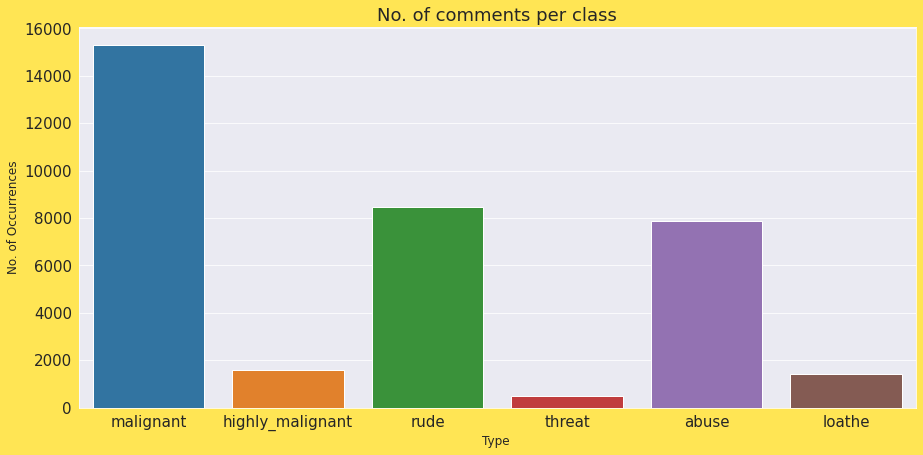

In [18]:
# Plot a chart with the following size
plt.figure(figsize=(15,7))

# Plot a bar chart using the index (category values) and the count of each category.
ax = sns.barplot(data_count.index, data_count.values)

plt.title("No. of comments per class")
plt.ylabel('No. of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
plt.show()


###### We can clearly see that the % of malignant comments are high in number.

## Feature Engineering

In [19]:
# Creating three different columns length, exclamation and question based on conditions
def feature_engg(df):
    
    df['length'] = df.comment_text.apply(lambda x: len(x))

    df['exclamation'] = df.comment_text.apply(lambda s: len([c for c in s if c == '!']))

    df['question'] = df.comment_text.apply(lambda s: len([c for c in s if c == '?']))

    # Normalization
    for label in ['length','question', 'exclamation']:
        minimum = df[label].min()
        diff = df[label].max() - minimum
        df[label] = df[label].apply(lambda x: (x-minimum) / (diff))

In [20]:
feature_engg(df)
df.head() # looking at the first 5 rows again

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,exclamation,question
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0.051852,0.000000,0.004785
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0.021421,0.000202,0.000000
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0.045646,0.000000,0.000000
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0.123524,0.000000,0.000000
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0.012412,0.000000,0.004785


## Text processing

In [21]:
#importing required nlp libraries for text processing 
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import wordnet
from nltk.corpus import wordnet as wn

In [22]:
# Performing lemmatization Using a function
def lemm(text):
    lemmatizer = wordnet.WordNetLemmatizer()
    word_tokens = word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(word, wn.VERB) for word in word_tokens]
    
    return " ".join(lemmas)
# Removing stopwords    
def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in string.punctuation]
    filtered_text = [word for word in filtered_text if word not in stop_words]
    return " ".join(filtered_text)

def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"im", "i am", text)
    text = re.sub(r"yo", "you",text)
    text = re.sub(r"youu", "you",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r'http\S+', '', text) # Removing urls as well
    return text

###### Now finally I will make a function to process our comment_text column using above functions.

In [23]:
## checking if the wordnet package is present 
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
## got an error to import the punkt package
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
## And omw-1.4 as well
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [29]:
## Now let's transform all the text to lower case
def text_proc(df):
    df['comment_text'] = df.comment_text.apply(lambda x: x.lower()) 
    df['comment_text'] = df.comment_text.apply(lambda x: re.sub(r'\d+','',x)) #removing numbers
    df['comment_text'] = df.comment_text.apply(lambda x: re.sub(r'\n',' ',x)) #removing \n
    df['comment_text'] = df.comment_text.apply(lambda x: decontracted(x))
    df['comment_text'] = df.comment_text.apply(lambda x: lemm(x))
    
    #removing punctuations
    translator = str.maketrans('','', string.punctuation)
    df['comment_text'] = df.comment_text.apply(lambda x : x.translate(translator))
    df['comment_text'] = df.comment_text.apply(lambda x: rem_stopwords(x))
text_proc(df)

### Exploratory Data Analysis (EDA)

In [30]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
# importing Image path and WordCloud modules
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [37]:
# frequently used words in the comments_text
def wordcloud(df, label):
    
    # Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="white",max_words=4000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(40,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244))

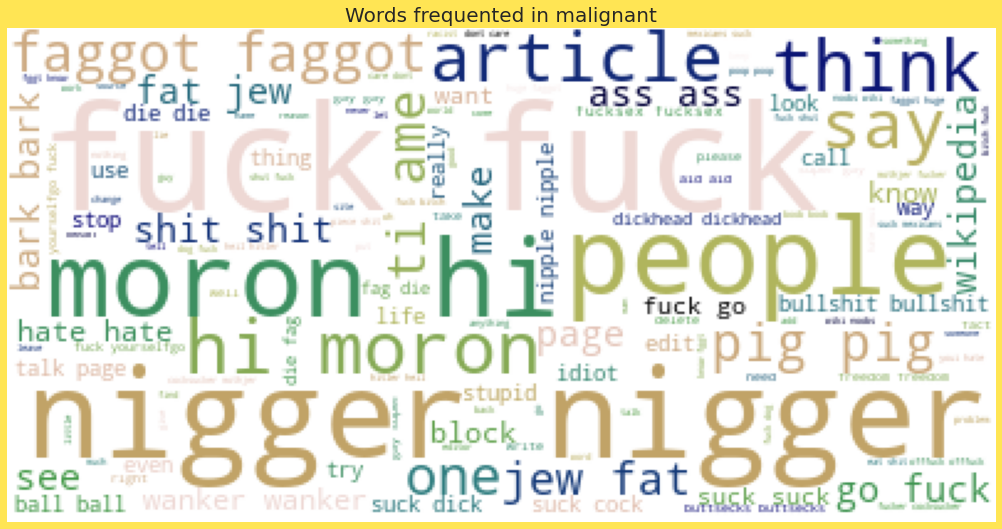

In [38]:
## Malignant Words
df_mal = df.loc[:,['id','comment_text','malignant']]
wordcloud(df_mal, 'malignant')

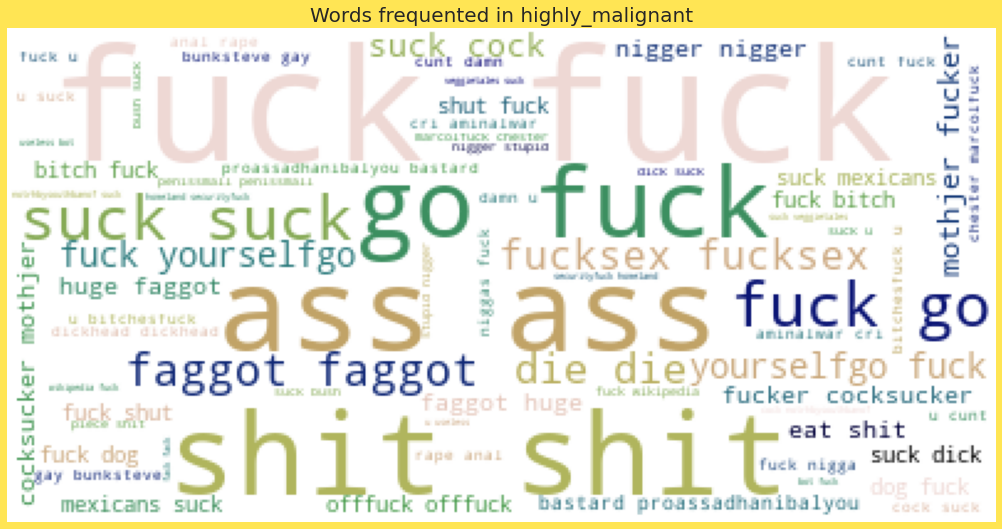

In [39]:
## Highly Malignant Words
df_Hmal = df.loc[:,['id','comment_text','highly_malignant']]
wordcloud(df_Hmal, 'highly_malignant')

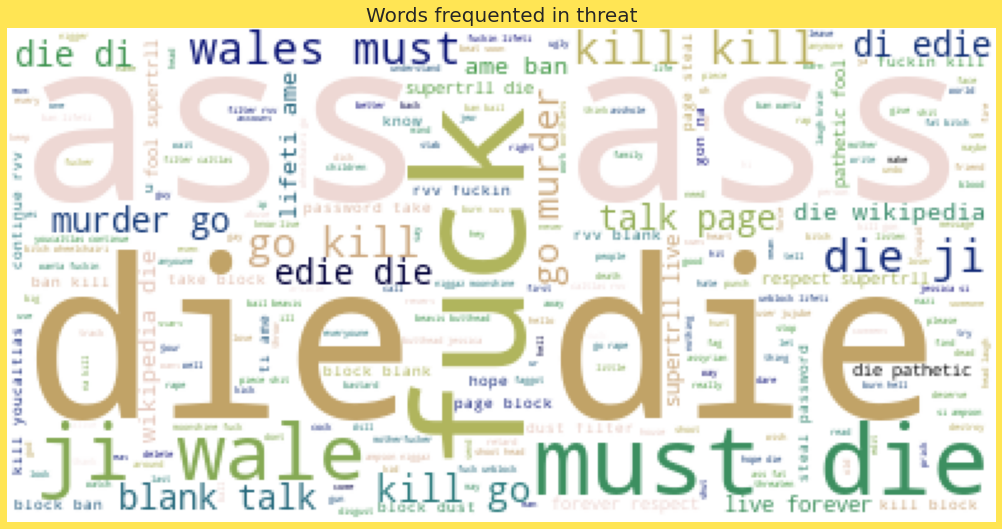

In [40]:
## Threatening Words
df_thr = df.loc[:,['id','comment_text','threat']]
wordcloud(df_thr, 'threat')

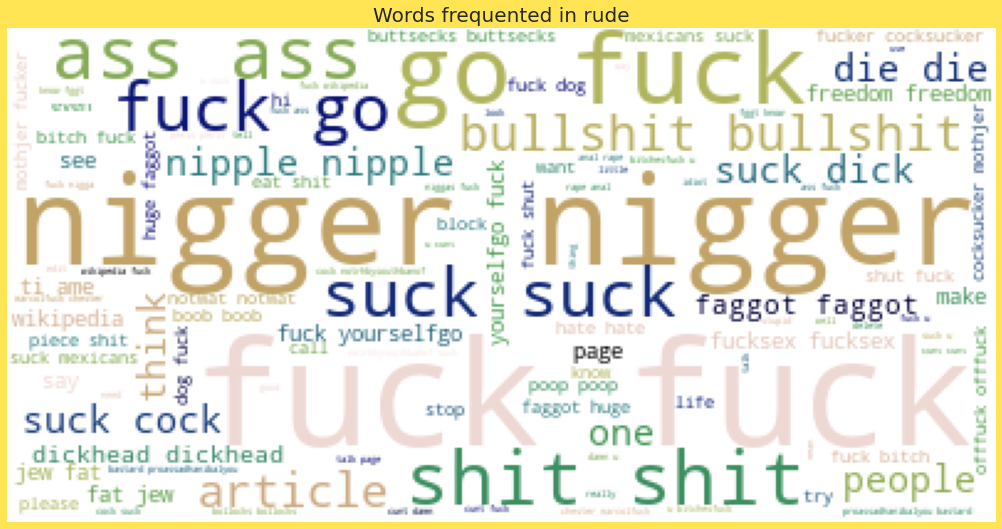

In [41]:
## Rude Words
df_rud = df.loc[:,['id','comment_text','rude']]
wordcloud(df_rud, 'rude')

## Model building:

###### Here for this perticular project let's use Tfidf vectorizer for our text column to convert text into vectors.

In [42]:
## importing the libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier

tfidf = TfidfVectorizer(analyzer='word',max_features=4000)

In [43]:
y = df.drop(columns = ['id','comment_text','length','exclamation','question'])

In [44]:
x = tfidf.fit_transform(df.comment_text)
x

<159571x4000 sparse matrix of type '<class 'numpy.float64'>'
	with 3470136 stored elements in Compressed Sparse Row format>

In [45]:
#lets check the shape of x and y
x.shape, y.shape

((159571, 4000), (159571, 6))

In [46]:
## Lets add remaining features to the x
length = []
exclamation = []
question = []

for i in df.length:
   length.append([i])
for i in df.exclamation:
   exclamation.append([i])
for i in df.question:
   question.append([i])
import scipy as sp



In [47]:
import scipy as sp
X = sp.sparse.hstack((x, length, exclamation, question))
X.shape, y.shape

((159571, 4003), (159571, 6))

### Spliting data into train and test sets:

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [54]:
!pip install wheel
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
## importing the models
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import f1_score,precision_score, multilabel_confusion_matrix, accuracy_score,jaccard_score, recall_score, hamming_loss
from sklearn.multiclass import OneVsRestClassifier

In [56]:
# making instances for the models
svc = LinearSVC()
lr = LogisticRegression(solver='lbfgs')
mnb = MultinomialNB()
lgb = LGBMClassifier()
sgd = SGDClassifier()

In [57]:
## Creating a function to show the accuracy score
def print_score(y_pred,clf):
    print('classifier:',clf.__class__.__name__)
    print("Jaccard score: {}".format(jaccard_score(y_test,y_pred,average='micro')))
    print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
    print("f1_score: {}".format(f1_score(y_test,y_pred,average='micro')))
    print("Precision : ", precision_score(y_test,y_pred,average='micro'))
    print("Recall: {}".format(recall_score(y_test,y_pred,average='micro')))
    print("Hamming loss: ", hamming_loss(y_test,y_pred))
    print("Confusion matrix:\n ", multilabel_confusion_matrix(y_test,y_pred))
    print('========================================\n')    

In [58]:
#models with evaluation using OneVsRestClassifier
for classifier in [svc,lr,mnb,sgd,lgb]:
   clf = OneVsRestClassifier(classifier)
   clf.fit(x_train,y_train)
   y_pred = clf.predict(x_test)
   print_score(y_pred, classifier)
   

classifier: LinearSVC
Jaccard score: 0.5457426147398549
Accuracy score: 0.9195848895796255
f1_score: 0.7061235286337786
Precision :  0.8494828957836118
Recall: 0.6041643091546905
Hamming loss:  0.018566331603706583
Confusion matrix:
  [[[35696   382]
  [ 1271  2544]]

 [[39420    67]
  [  305   101]]

 [[37590   160]
  [  694  1449]]

 [[39769    19]
  [   82    23]]

 [[37610   272]
  [  869  1142]]

 [[39490    46]
  [  277    80]]]

classifier: LogisticRegression
Jaccard score: 0.522853258027403
Accuracy score: 0.9199107612864412
f1_score: 0.6866758241758243
Precision :  0.8734929232919797
Recall: 0.5656897137037457
Hamming loss:  0.019059317006325252
Confusion matrix:
  [[[35821   257]
  [ 1429  2386]]

 [[39416    71]
  [  288   118]]

 [[37620   130]
  [  774  1369]]

 [[39781     7]
  [   92    13]]

 [[37650   232]
  [  959  1052]]

 [[39509    27]
  [  296    61]]]

classifier: MultinomialNB
Jaccard score: 0.4387179214141199
Accuracy score: 0.9130674554433108
f1_score: 0.60987

## Hyperparameter Tuning:

In [59]:
## Creating the parameters dictionary
param = {
        'estimator__penalty': ['l1'],
        'estimator__loss': ['hinge','squared_hinge'],
        'estimator__multi_class': ['ovr','crammer_singer'],
        'estimator__dual': [False],
        'estimator__intercept_scaling': [2,4,5],
        'estimator__C': [2]
        }

In [60]:
#train the model with given parameters using GridSearchCV
svc = OneVsRestClassifier(LinearSVC())
GCV =  GridSearchCV(svc,param,cv = 3, verbose =0,n_jobs=-1)
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=OneVsRestClassifier(estimator=LinearSVC()),
             n_jobs=-1,
             param_grid={'estimator__C': [2], 'estimator__dual': [False],
                         'estimator__intercept_scaling': [2, 4, 5],
                         'estimator__loss': ['hinge', 'squared_hinge'],
                         'estimator__multi_class': ['ovr', 'crammer_singer'],
                         'estimator__penalty': ['l1']})

In [61]:
#printing the best parameters found by GridSearchCV
GCV.best_params_

{'estimator__C': 2,
 'estimator__dual': False,
 'estimator__intercept_scaling': 2,
 'estimator__loss': 'squared_hinge',
 'estimator__multi_class': 'ovr',
 'estimator__penalty': 'l1'}

## Final Model:

In [62]:
model = OneVsRestClassifier(LinearSVC(C=2,dual = False, loss='squared_hinge',multi_class='ovr', penalty ='l1',intercept_scaling=4))
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("Jaccard score: {}".format(jaccard_score(y_test,y_pred,average='micro')))
print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
print("f1_score: {}".format(f1_score(y_test,y_pred,average='micro')))
print("Precision : ", precision_score(y_test,y_pred,average='micro'))
print("Recall: {}".format(recall_score(y_test,y_pred,average='micro')))
print("Hamming loss: ", hamming_loss(y_test,y_pred))
print("\nConfusion matrix: \n", multilabel_confusion_matrix(y_test,y_pred))

Jaccard score: 0.5498421749312697
Accuracy score: 0.9197603589602186
f1_score: 0.7095460219433677
Precision :  0.8458646616541353
Recall: 0.6110671042208894
Hamming loss:  0.018470241228619892

Confusion matrix: 
 [[[35684   394]
  [ 1246  2569]]

 [[39412    75]
  [  295   111]]

 [[37586   164]
  [  682  1461]]

 [[39762    26]
  [   76    29]]

 [[37606   276]
  [  871  1140]]

 [[39487    49]
  [  267    90]]]


In [63]:
model.predict(X)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

## Saving the best Model

In [64]:
import joblib
joblib.dump(model,"Malignant_comment.pkl")

['Malignant_comment.pkl']

In [65]:
#loading the model
model = joblib.load('Malignant_comment.pkl')

##### Now Let's Predict the for the results on the test dataset using our saved model Malignant_comment.pkl

In [66]:
#Lets load the test data set
test = pd.read_csv(r"/content/gdrive/My Drive/test.csv")
test.head()


0.0

In [67]:
#feature engineering
feature_engg(test) 
test.head()

,id,comment_text,length,exclamation,question
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,0.073215,0.0,0.0
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,0.009802,0.0,0.0
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",0.010602,0.0,0.0
3,00017563c3f7919a,":If you have a look back at the source, the in...",0.040808,0.0,0.0
4,00017695ad8997eb,I don't anonymously edit articles at all.,0.008002,0.0,0.0


In [68]:
#processing the test data set
text_proc(test)   

test.head()

,id,comment_text,length,exclamation,question
0,00001cee341fdb12,bitch ja rule succesful ever whats hat sad mof...,0.073215,0.0,0.0
1,0000247867823ef7,rfc title fine amo,0.009802,0.0,0.0
2,00013b17ad220c46,source zawe ashton lapland —,0.010602,0.0,0.0
3,00017563c3f7919a,look back source information update correct fo...,0.040808,0.0,0.0
4,00017695ad8997eb,anonymously edit article,0.008002,0.0,0.0


In [69]:
tfidf = TfidfVectorizer(analyzer = 'word', max_features=4000)
X = tfidf.fit_transform(test.comment_text)

In [70]:
## let's add these additional columns to the test data as well
length = []
exclamation = []
question = []
source = []
for i in test.length:
   length.append([i])
for i in test.exclamation:
   exclamation.append([i])
for i in test.question:
   question.append([i])

import scipy as sp
X_test = sp.sparse.hstack((X, length, exclamation, question))

In [71]:
#lets predict the output now
model.predict(X_test)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [72]:
predictions = model.predict(X_test)

In [75]:
pred=pd.DataFrame(predictions, columns = ['malignant','highly_malignant','rude','threat','abuse','loathe'])
pred.head()

,malignant,highly_malignant,rude,threat,abuse,loathe
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [76]:
x_test = pd.concat([test,pred], axis=1)
x_test 